In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [2]:
# tuple selecting the first and the last column of every column in the data file
col = [(0, 12), (13, 25), (26, 38), (39, 51)]
# column name
name = ['A', 'B', 'C', 'D']
# import data
data = pd.read_fwf('C:/Users/potis/Desktop/data', header=None, colspecs=col, names=name,dtype=np.float)

In [3]:
split = int(256*256)
# properly store the matrices from dataframe
A = data.values.flatten()[0:split].reshape(256,256)
B = data.values.flatten()[split:2*split].reshape(256,256)
G = data.values.flatten()[2*split:3*split].reshape(256,256)

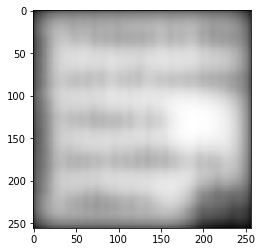

In [4]:
# deblured image
imgplot = plt.imshow(G, cmap='gray')

In [6]:
#  class solve that contains a custom function for the trancated svd and tikhonov regularization
class solv:
#  K matrix is the kroniger product of a,b matrices
# g is the blured image 
# k is the regularization term (how many dimensions of the svd analysic to use)
    def tsvd(a,b,g,k=None):
# In no regularization parameter is given the the normal svd is computed
        if k is solv.tsvd.__defaults__[0]:
            k = len(a)
#   compute the svd for matrix a,b
        U_A,S_A,V_A = np.linalg.svd(a)
        U_B,S_B,V_B = np.linalg.svd(b)
        
        g_hat = np.dot(np.dot(U_B[:,0:k].T,g),U_A[:,0:k])
        S = np.dot(S_B[0:k].reshape(-1,1),S_A[0:k].reshape(1,-1))

        f_hat = g_hat /S
        fc = np.dot(np.dot(V_B[0:k,:].T,f_hat),V_A[0:k,:])

        return fc,S
    def tikhonov(a,b,g,a_=0):
        U_A,S_A,V_A = np.linalg.svd(a)
        U_B,S_B,V_B = np.linalg.svd(b)

        g_hat = np.dot(np.dot(U_B.T,g),U_A)
        S = np.dot(S_B.reshape(-1,1),S_A.reshape(1,-1))
        gcv = (np.square(g_hat/(S**2 + a_**2)).sum()*len(U_A))/(np.square((1/(S**2 + a_**2)).sum()))
#       compute the filter 
        filter_ = (S**2/(S**2 + a_**2))/S

        f_hat = g_hat *filter_
        fc = np.dot(np.dot(V_B.T,f_hat),V_A)


        return fc,gcv

In [7]:
gcv = []
for i in  np.arange(0.0000001,0.004,0.00001):
    _,r = solv.tikhonov(A,B,G,a_=i)
    gcv.append(r)

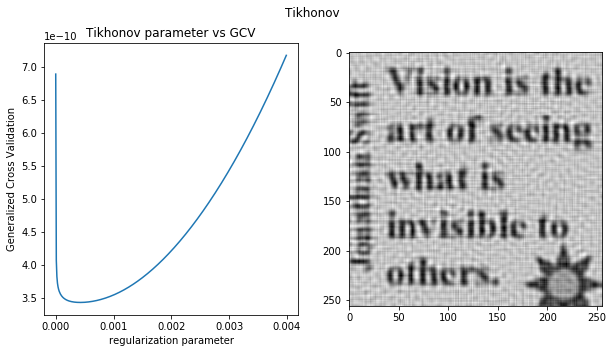

In [279]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols= 2,figsize=(10,5))
fig.suptitle('Tikhonov ')
ax1.plot(np.arange(0.0000001,0.004,0.00001),gcv)
ax1.set_xlabel("regularization parameter")
ax1.set_ylabel("Generalized Cross Validation")
ax1.set_title("Tikhonov parameter vs GCV")


fc,_ =solv.tikhonov(A,B,G,a_= np.arange(0.0000001,0.004,0.00001)[np.argmin(gcv)])
ax2.imshow(fc,cmap='gray')
plt.show()

40


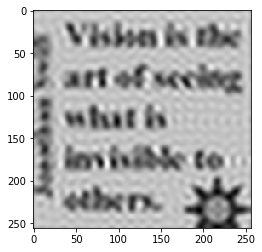

41


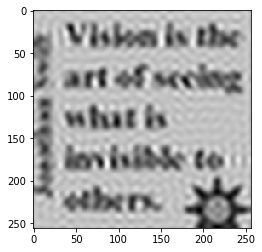

42


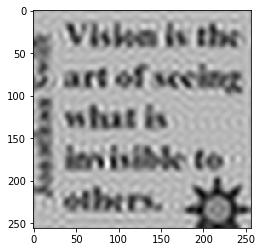

43


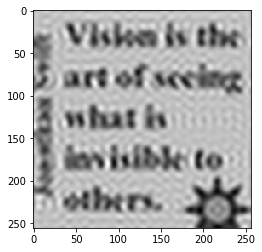

44


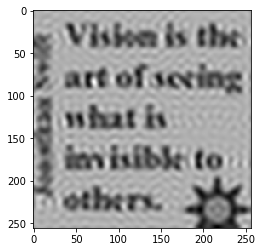

45


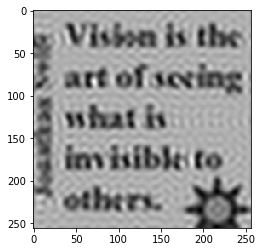

46


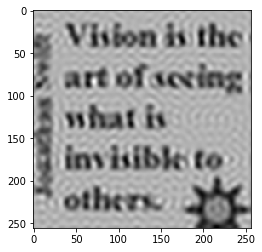

47


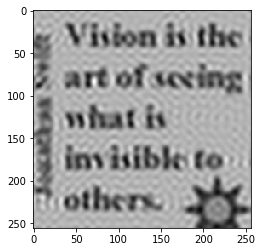

48


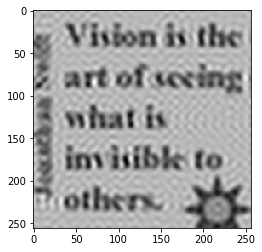

49


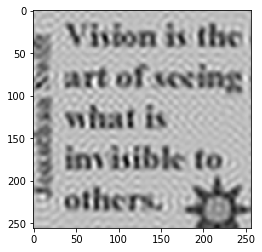

50


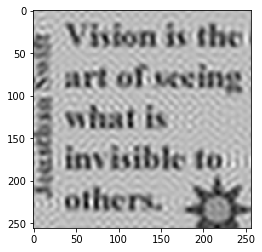

51


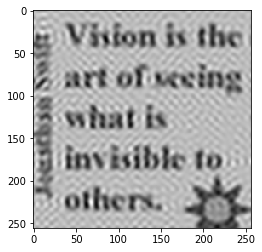

52


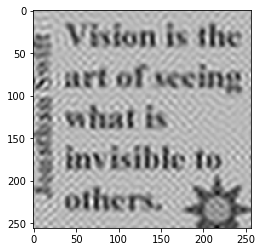

53


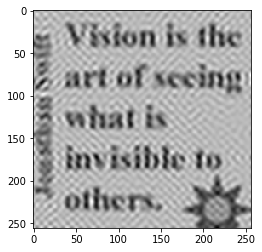

54


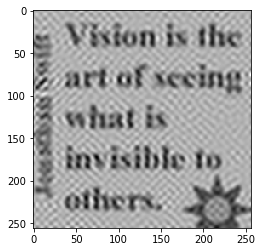

55


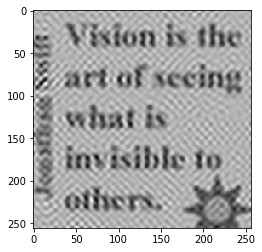

56


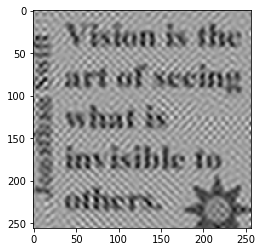

57


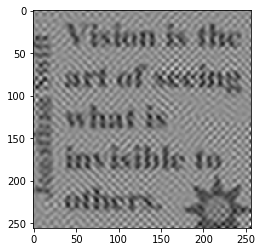

58


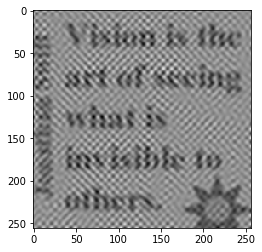

59


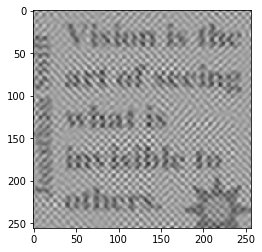

In [27]:
for i in range(40,60):
    fc,s = solv.tsvd(A,B,G,k=i)
    print(i)
    plt.imshow(fc,cmap='gray')
    plt.show()